Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import datetime as dt
from sktime.utils.plotting import plot_series
import holidays

Loading in hotel data sets

In [2]:
# Dataset containing information about hotels pre-aggregation
hotels_raw = pd.read_csv('raw_hotel_demand.csv')
print(hotels_raw.shape)

# Dataset containing aggregated hotel demand data
hotels_agg = pd.read_csv('aggregated_hotel_demand.csv').drop(columns= 'Unnamed: 0')

hotels_agg['arrival_date'] = pd.to_datetime(hotels_agg['arrival_date']) # Convert to datetime
print(hotels_agg.shape) 

(119390, 37)
(793, 62)


EDA
- Distributions -> histograms for country, room type, agent, company, etc
- Seasonality trends -> Day, Month, Year, for ADR, demand, etc.
- Pie charts --> room assignemnt moved or not

#  Seasonality

## Average price month over month

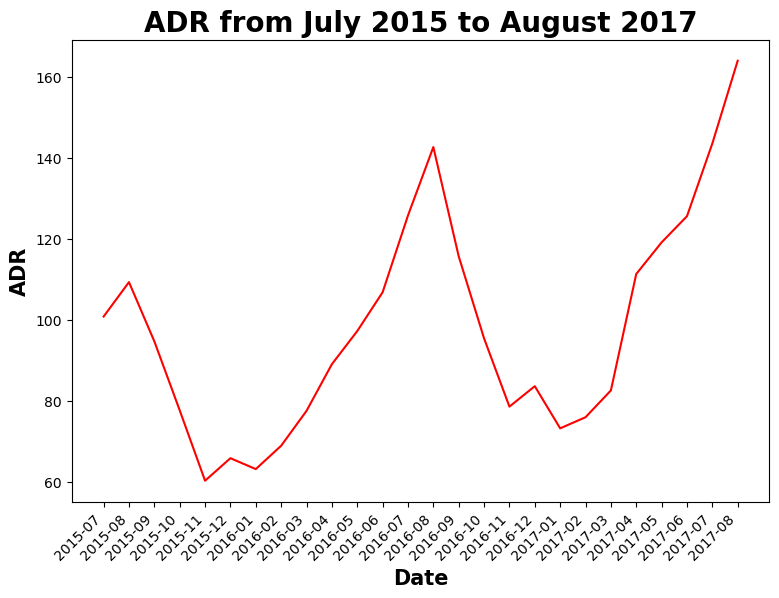

In [3]:
# Dataframe to track the average price month to month from beginning date to end date
price_over_time = hotels_agg.groupby(hotels_agg['arrival_date'].dt.to_period("M")).agg(adr = ('adr', 'mean')).reset_index()

ax = plt.figure(figsize= (9,6)) # Define figure and set size to 6x6

# Have to change the arrival date col to string, because seaborn does is not able to use it as an index 
sns.lineplot(data = price_over_time, x = price_over_time['arrival_date'].dt.strftime('%Y-%m'), y = 'adr', color = 'red')
plt.title('ADR from July 2015 to August 2017', fontdict = {'fontweight':'bold', 'fontsize': 20})


# X axis
plt.xlabel(xlabel= 'Date',fontdict = {'fontweight':'bold', 'fontsize': 15})
plt.xticks(rotation = 45, ha = 'right') # Rotate x tick labels to make plot more readable
# Y axis
plt.ylabel(ylabel= 'ADR', fontdict ={'fontweight': 'bold', 'fontsize': 15})
plt.show() # THis hides x tick labels from printing 

## Demand month to month

In [4]:
# Dataframe that tracks demand from month to month in the dataset
demand_over_time = hotels_agg.groupby(hotels_agg['arrival_date'].dt.to_period('M'))['bookings'].sum().reset_index()
demand_over_time['bookings'].sum() # THis is the correct count for total bookings

np.int64(119390)

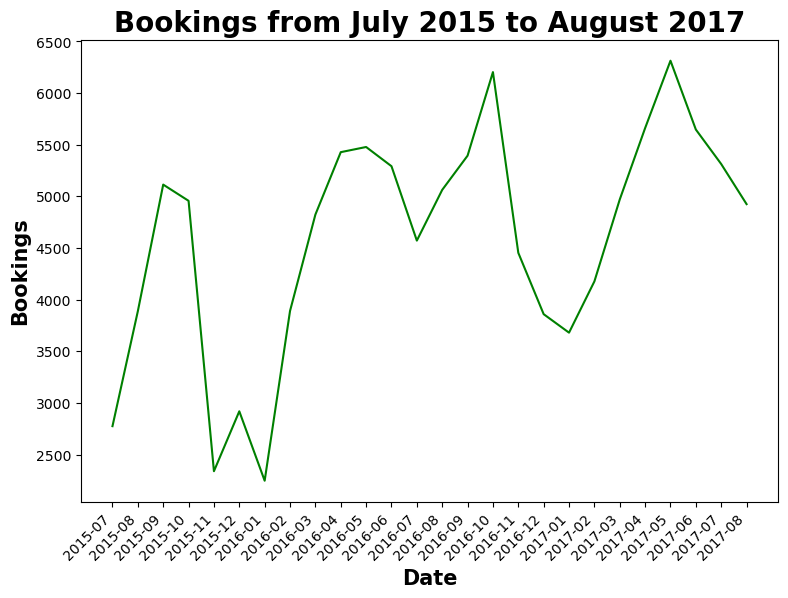

In [5]:
ax = plt.figure(figsize= (9,6)) # Define figure and set size to 6x6

# Have to change the arrival date col to string, because seaborn does is not able to use it as an index 
sns.lineplot(data = demand_over_time, x = price_over_time['arrival_date'].dt.strftime('%Y-%m'), y = 'bookings', color = 'green')
plt.title('Bookings from July 2015 to August 2017', fontdict = {'fontweight':'bold', 'fontsize': 20})


# X axis
plt.xlabel(xlabel= 'Date',fontdict = {'fontweight':'bold', 'fontsize': 15})
plt.xticks(rotation = 45, ha = 'right') # Rotate x tick labels to make plot more readable
# Y axis
plt.ylabel(ylabel= 'Bookings', fontdict ={'fontweight': 'bold', 'fontsize': 15})
plt.show() # THis hides x tick labels from printing 

## TS Plot of Demand

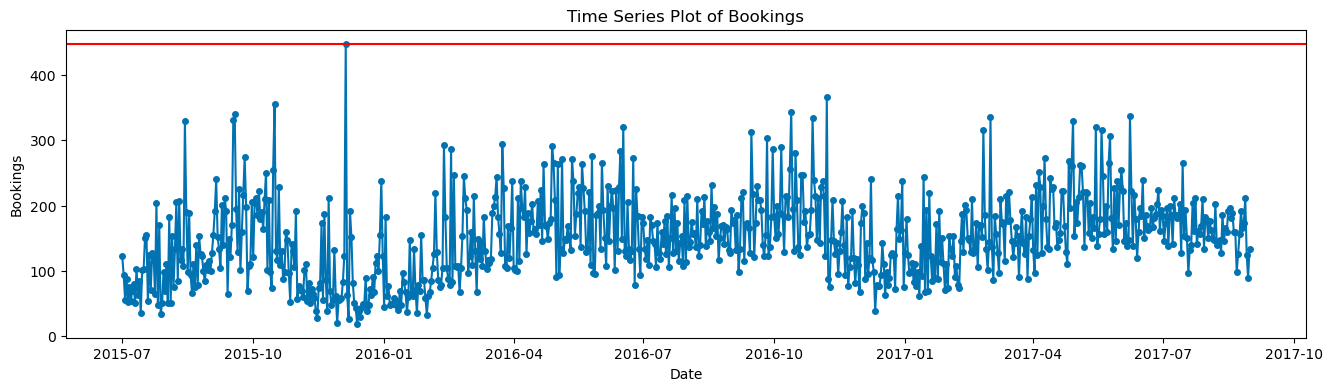

In [6]:
# Select arrival date and bookings col to facilitate time series plot
ts_data = hotels_agg[['arrival_date', 'bookings']]

# Create pandas series from ts_data to use it in sktime plot_series (only accepts series objects)
ts_plot_data = ts_data.set_index('arrival_date')['bookings'].sort_index()

# Plot time series of demand over time
fig, ax = plot_series(ts_plot_data)
ax.set_title('Time Series Plot of Bookings')

ax.set_xlabel('Date')
ax.set_ylabel('Bookings')

plt.axhline(y =hotels_agg['bookings'].max(), color = 'red')
plt.show()

In [7]:
hotels_agg['bookings'].max()

448

In [8]:
from sktime.utils.plotting import plot_correlations

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: ylabel='bookings'>,
        <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

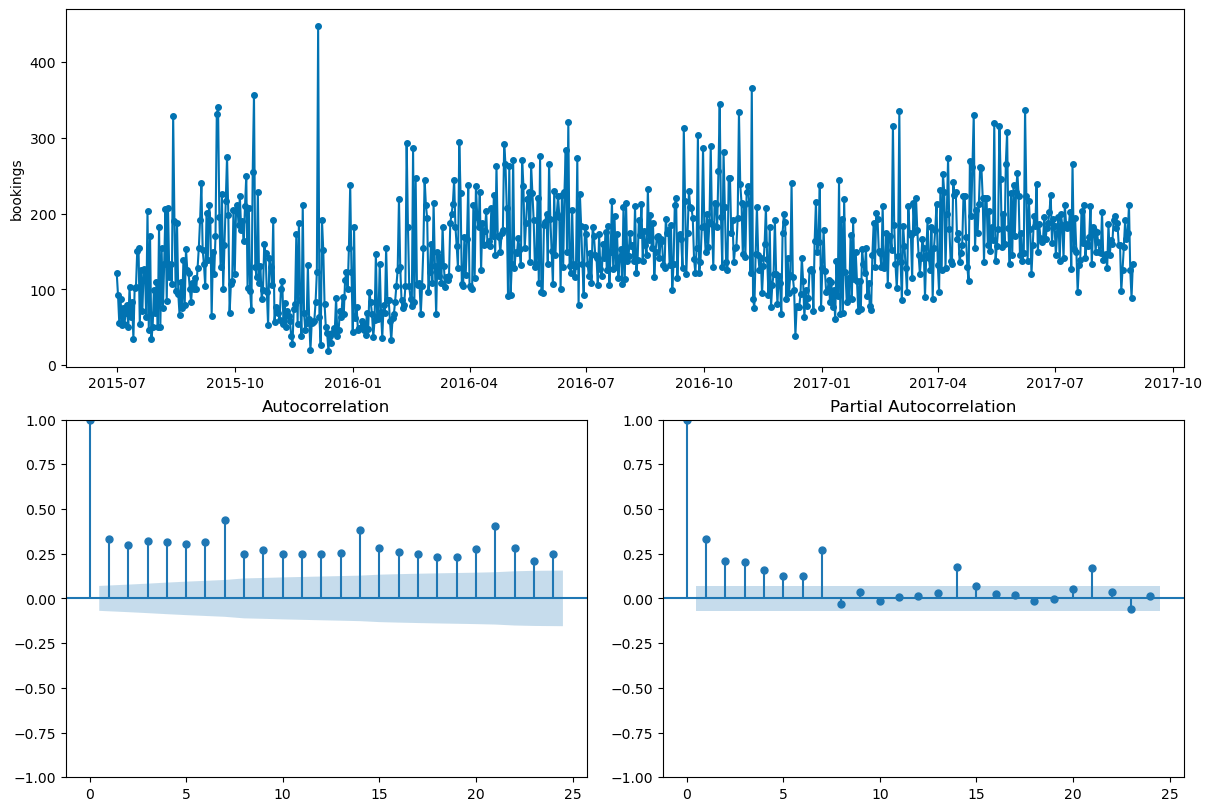

In [9]:
plot_correlations(ts_plot_data)

Investigating Outlier

## Seasonal Box Plots

In [10]:
monthy_order = ['January', 'February','March', 'April',
                'May', 'June', 'July', 'August',
                'September', 'October', 'November', 'December']
daily_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']

### ADR Boxplots

ADR by Month

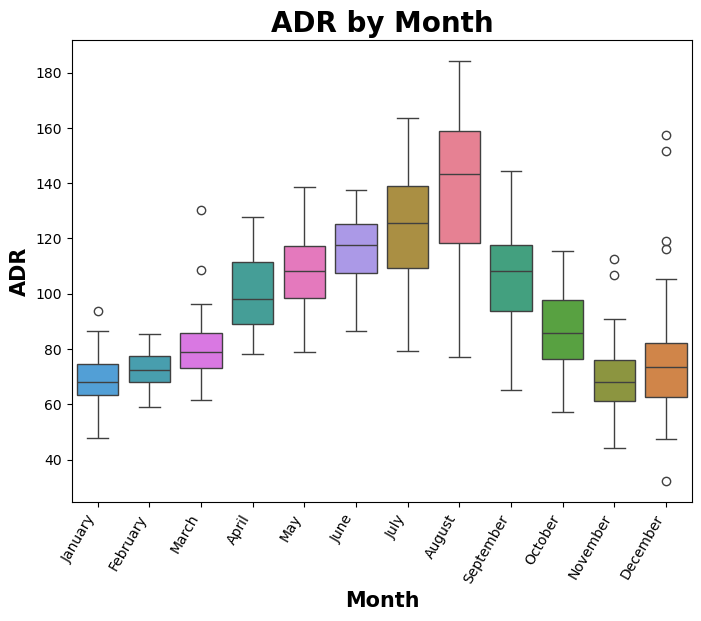

In [11]:
plt.figure(figsize=( 8,6))

ax = sns.boxplot(data = hotels_agg, 
            x = 'arrival_date_month', 
            y ='adr', 
            hue = 'arrival_date_month',
            order = monthy_order)

plt.title('ADR by Month', fontdict = {'fontweight':'bold', 'fontsize': 20})


# X axis
plt.xlabel(xlabel= 'Month',fontdict = {'fontweight':'bold', 'fontsize': 15})
plt.xticks(rotation = 60, ha = 'right', fontweight = 'normal') # Rotate x tick labels to make plot more readable
# Y axis
plt.ylabel(ylabel= 'ADR', fontdict ={'fontweight': 'bold', 'fontsize': 15})
plt.show() # THis hides x tick labels from printing 

ADR by day of week

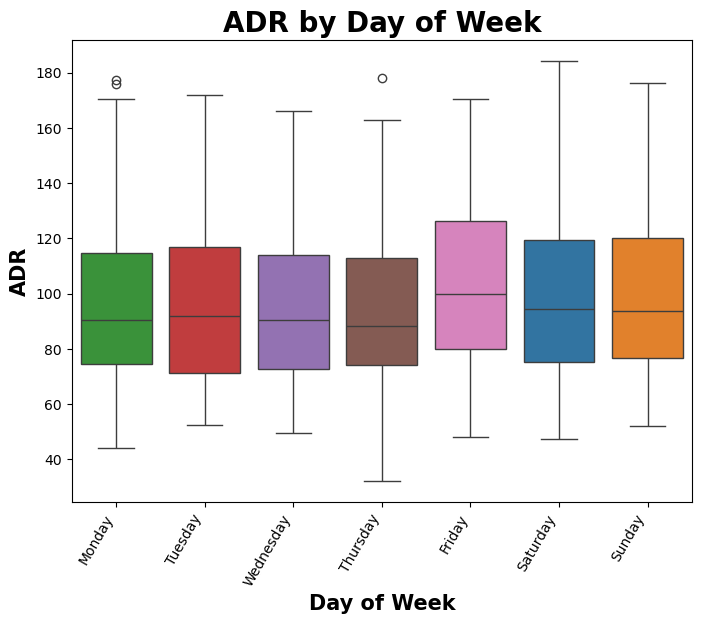

In [12]:
plt.figure(figsize=( 8,6))

ax = sns.boxplot(data = hotels_agg, 
            x = 'arrival_day_of_week', 
            y ='adr', 
            hue = 'arrival_day_of_week',
            order = daily_order)

plt.title('ADR by Day of Week', fontdict = {'fontweight':'bold', 'fontsize': 20})


# X axis
plt.xlabel(xlabel= 'Day of Week',fontdict = {'fontweight':'bold', 'fontsize': 15})
plt.xticks(rotation = 60, ha = 'right') # Rotate x tick labels to make plot more readable
# Y axis
plt.ylabel(ylabel= 'ADR', fontdict ={'fontweight': 'bold', 'fontsize': 15})
plt.show() # THis hides x tick labels from printing 

### Bookings (Demand) Boxplots

Bookings by Month

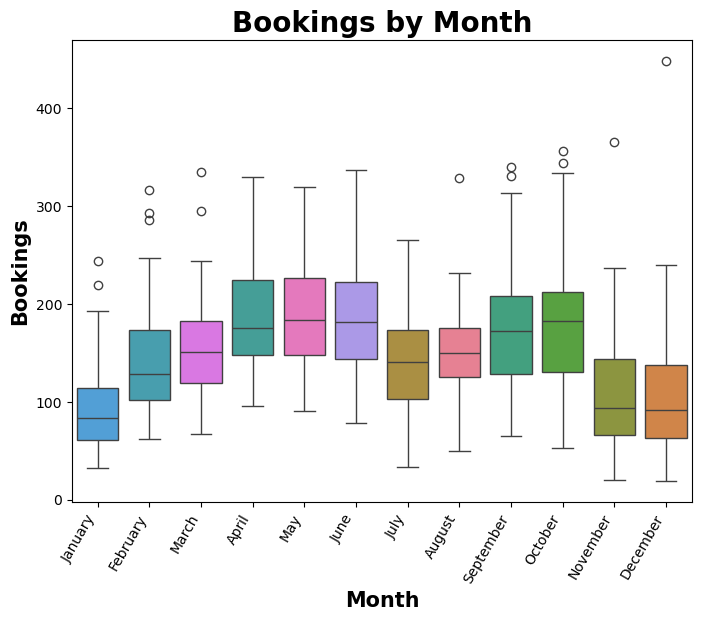

In [13]:
plt.figure(figsize=( 8,6))

ax = sns.boxplot(data = hotels_agg, 
            x = 'arrival_date_month', 
            y ='bookings', 
            hue = 'arrival_date_month',
            order = monthy_order)

plt.title('Bookings by Month', fontdict = {'fontweight':'bold', 'fontsize': 20})


# X axis
plt.xlabel(xlabel= 'Month',fontdict = {'fontweight':'bold', 'fontsize': 15})
plt.xticks(rotation = 60, ha = 'right', fontweight = 'normal') # Rotate x tick labels to make plot more readable
# Y axis
plt.ylabel(ylabel= 'Bookings', fontdict ={'fontweight': 'bold', 'fontsize': 15})
plt.show() # THis hides x tick labels from printing 

Bookings by day of week

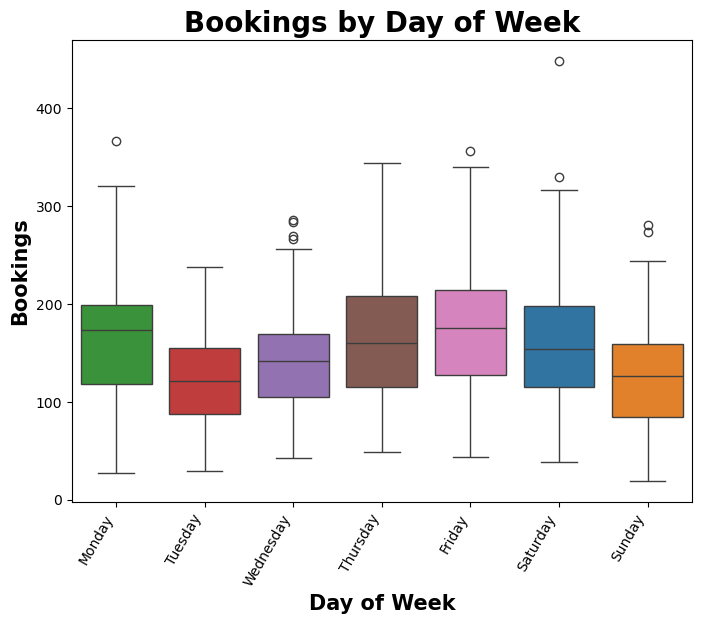

In [14]:
plt.figure(figsize=( 8,6))

ax = sns.boxplot(data = hotels_agg, 
            x = 'arrival_day_of_week', 
            y ='bookings', 
            hue = 'arrival_day_of_week',
            order = daily_order)

plt.title('Bookings by Day of Week', fontdict = {'fontweight':'bold', 'fontsize': 20})


# X axis
plt.xlabel(xlabel= 'Day of Week',fontdict = {'fontweight':'bold', 'fontsize': 15})
plt.xticks(rotation = 60, ha = 'right', fontweight = 'normal') # Rotate x tick labels to make plot more readable
# Y axis
plt.ylabel(ylabel= 'Bookings', fontdict ={'fontweight': 'bold', 'fontsize': 15})
plt.show() # THis hides x tick labels from printing 

### Revenue Boxplots

Revenue by month

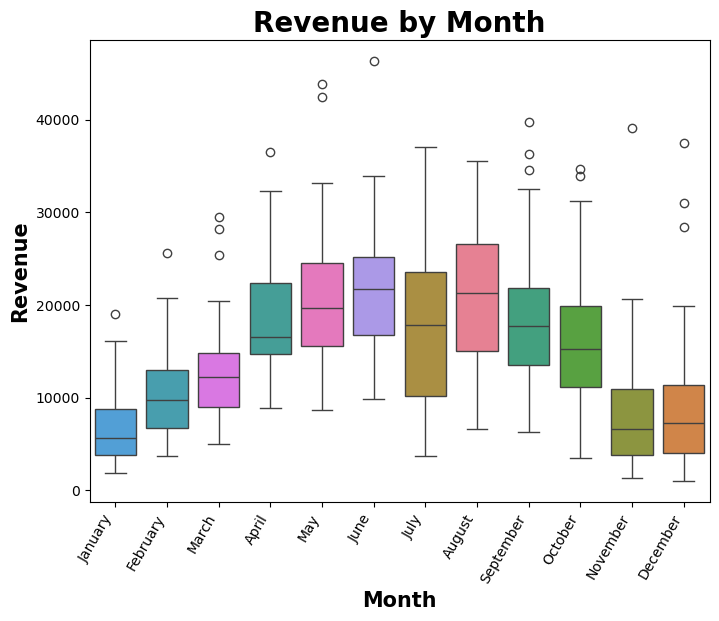

In [15]:
plt.figure(figsize=( 8,6))

ax = sns.boxplot(data = hotels_agg, 
            x = 'arrival_date_month', 
            y ='revenue', 
            hue = 'arrival_date_month',
            order = monthy_order)

plt.title('Revenue by Month', fontdict = {'fontweight':'bold', 'fontsize': 20})


# X axis
plt.xlabel(xlabel= 'Month',fontdict = {'fontweight':'bold', 'fontsize': 15})
plt.xticks(rotation = 60, ha = 'right', fontweight = 'normal') # Rotate x tick labels to make plot more readable
# Y axis
plt.ylabel(ylabel= 'Revenue', fontdict ={'fontweight': 'bold', 'fontsize': 15})
plt.show() # THis hides x tick labels from printing 

Revenue by day of week

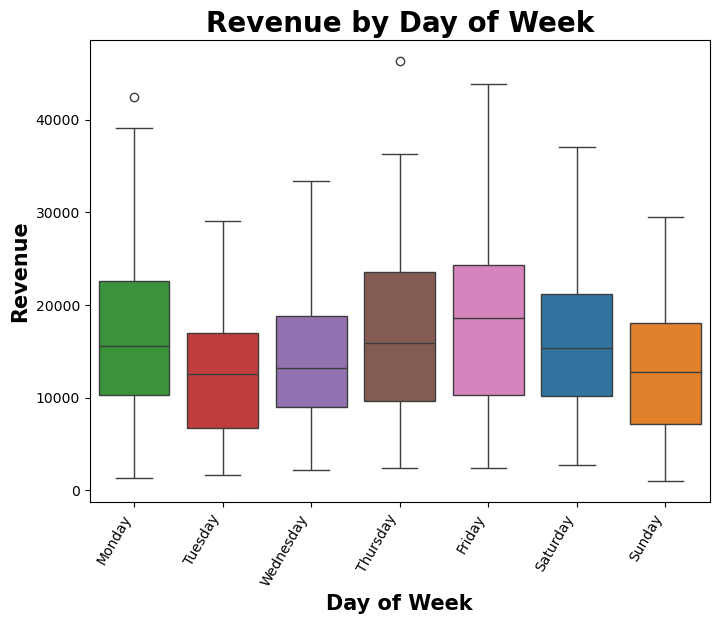

In [16]:
plt.figure(figsize=( 8,6))

ax = sns.boxplot(data = hotels_agg, 
            x = 'arrival_day_of_week', 
            y ='revenue', 
            hue = 'arrival_day_of_week',
            order = daily_order)

plt.title('Revenue by Day of Week', fontdict = {'fontweight':'bold', 'fontsize': 20})


# X axis
plt.xlabel(xlabel= 'Day of Week',fontdict = {'fontweight':'bold', 'fontsize': 15})
plt.xticks(rotation = 60, ha = 'right', fontweight = 'normal') # Rotate x tick labels to make plot more readable
# Y axis
plt.ylabel(ylabel= 'Revenue', fontdict ={'fontweight': 'bold', 'fontsize': 15})
plt.show() # THis hides x tick labels from printing 

# Variable Distributions (Bar Plots)
- Histograms
- Pie charts
- Bar Graphs

Functions to create df and visualize distribution across categorical variables from raw data

In [17]:
def raw_df_distr(raw_df, col, norm_tf):
    """
    Input raw hotel df and string of desired col \n
    Returns barplot (normalized or by count)
    """

    df = raw_df
    
    distr_df = df[col].value_counts(normalize = norm_tf).reset_index()

    return(distr_df)

def visualize_distr(distr_df, title):
    """
    Input 
    """
    x_vals = distr_df.iloc[:,0]
    y_vals = distr_df.iloc[:, 1]

    plt.figure(figsize=(9,6))
    ax = sns.barplot(data = distr_df, x = x_vals, y = y_vals, hue = x_vals)
    plt.title(title, fontdict = {'fontweight':'bold', 'fontsize': 20})

    plt.xticks(rotation = 60, ha = 'right', fontweight = 'normal') # Rotate x tick labels to make plot more readable

    plt.show()

## Market Segment

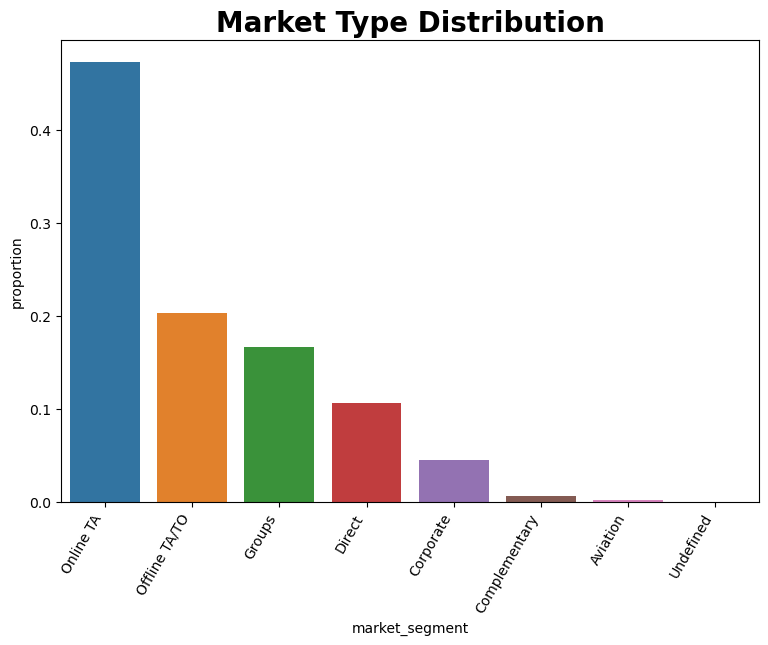

In [18]:
visualize_distr(raw_df_distr(hotels_raw, 'market_segment', True), 'Market Type Distribution')

## Country

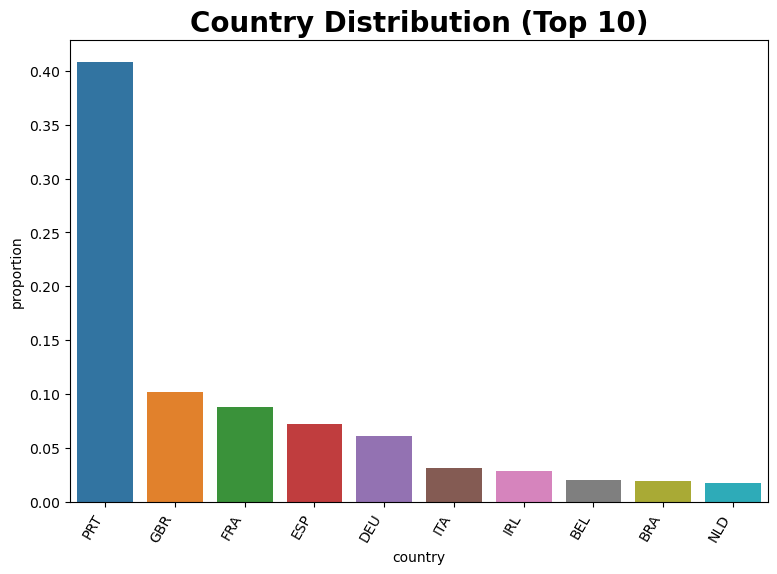

In [19]:
visualize_distr(raw_df_distr(raw_df= hotels_raw, col = 'country',norm_tf= True).head(10), title=  'Country Distribution (Top 10)')

In [20]:
hotels_raw['country'].value_counts(normalize= True).head(10).sum()
# Top 10 countries encapsulate 84% of the data, might make more sense to just use these countries
# Specifically for encoding holidays
# Available Countries in the holidays library:
# Portugal, England, France, Spain, Germany
# Italy, Ireland, Belgium, Netherlands
# BRAZIL is not present in the lib

np.float64(0.847756976333451)

## Customer Type

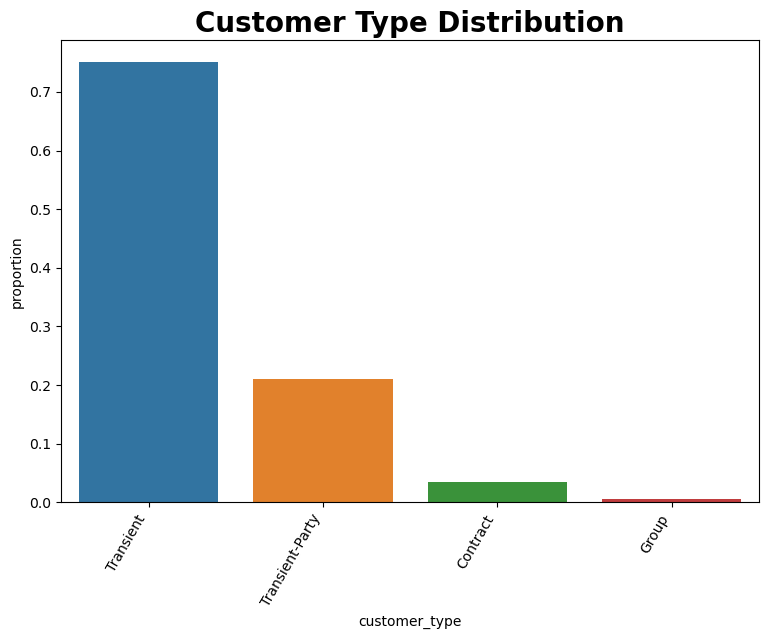

In [21]:
visualize_distr(raw_df_distr(raw_df= hotels_raw, col = 'customer_type',norm_tf= True).head(10), title=  'Customer Type Distribution')

## Distribution Channel

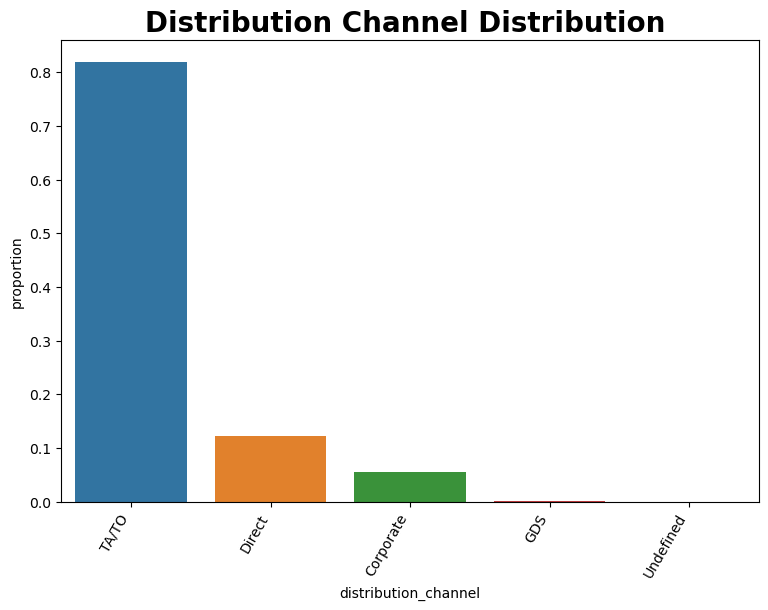

In [22]:
visualize_distr(raw_df_distr(raw_df= hotels_raw, col = 'distribution_channel',norm_tf= True).head(10), title=  'Distribution Channel Distribution ')

##  Assigned Room Type

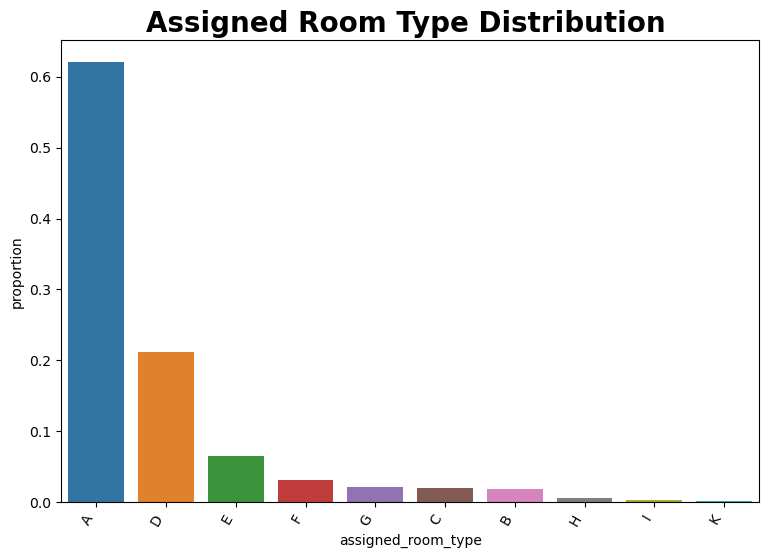

In [23]:
visualize_distr(raw_df_distr(raw_df= hotels_raw, col = 'assigned_room_type',norm_tf= True).head(10), title =  'Assigned Room Type Distribution ')

## Meal

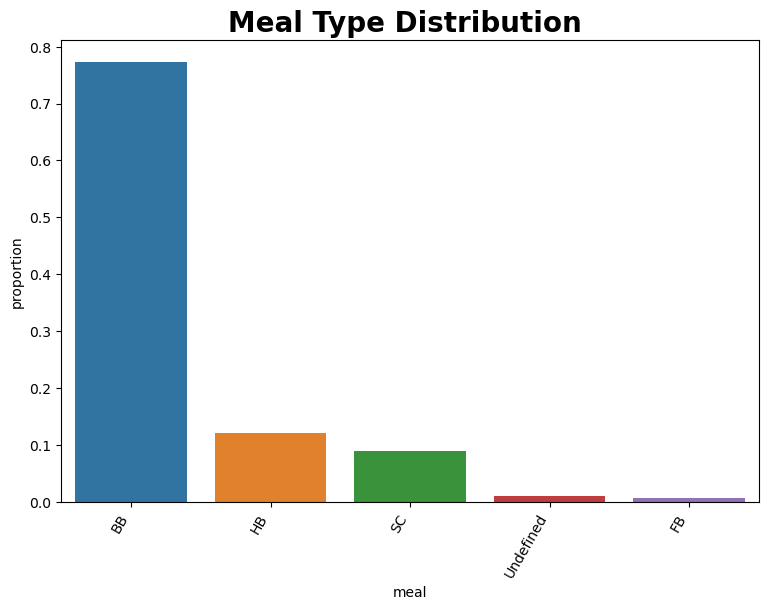

In [24]:
visualize_distr(raw_df_distr(raw_df= hotels_raw, col = 'meal',norm_tf= True).head(10), title =  'Meal Type Distribution ')

# Variable Distributions (Histograms)
- {\displaystyle {\hat {k}}=1+\log _{2}(n)}

In [25]:
# This is the opt number of bins to use based on sturge's law
1+ np.log2(len(hotels_agg))

np.float64(10.63117705570398)

Function for creating histograms

In [26]:
def hist_distr(col, title):
    ax = plt.figure(figsize = (9,6))
    sns.histplot(data = hotels_agg, x= col, stat= 'proportion', bins = 11, color= 'blue')

    plt.title(title, fontdict = {'fontweight':'bold', 'fontsize': 20})

    # X axis
    plt.xlabel(xlabel= col,fontdict = {'fontweight':'bold', 'fontsize': 15})
    # Y axis
    plt.ylabel(ylabel= 'Proportion', fontdict ={'fontweight': 'bold', 'fontsize': 15})
    plt.show()

## ADR Histogram

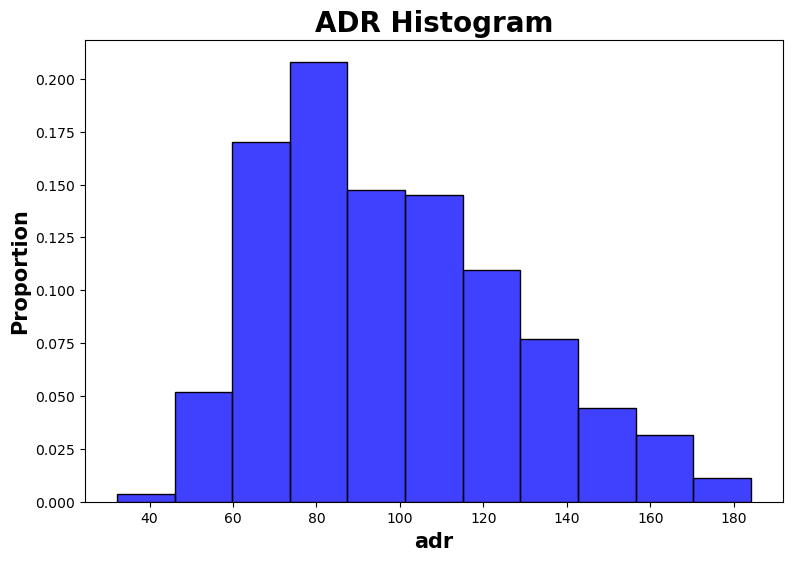

In [27]:
hist_distr('adr', 'ADR Histogram')

## Bookings Distribution

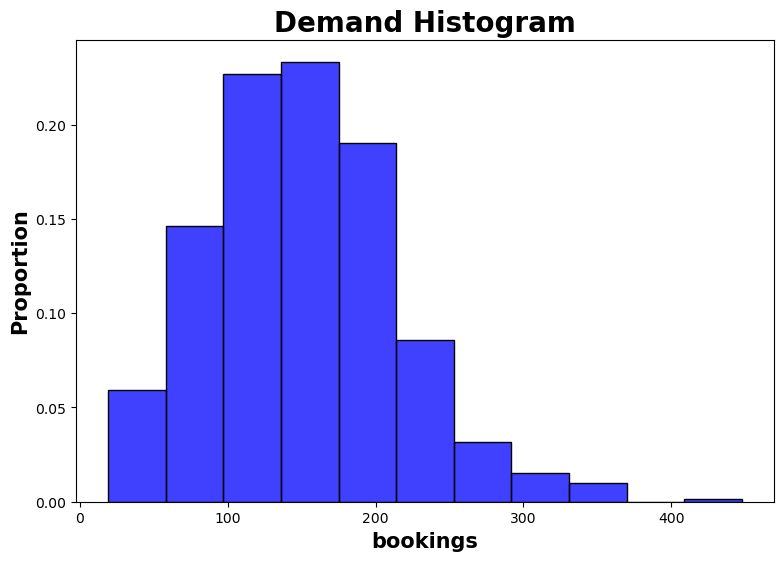

In [28]:
hist_distr('bookings', 'Demand Histogram')

## Lead Time distribution

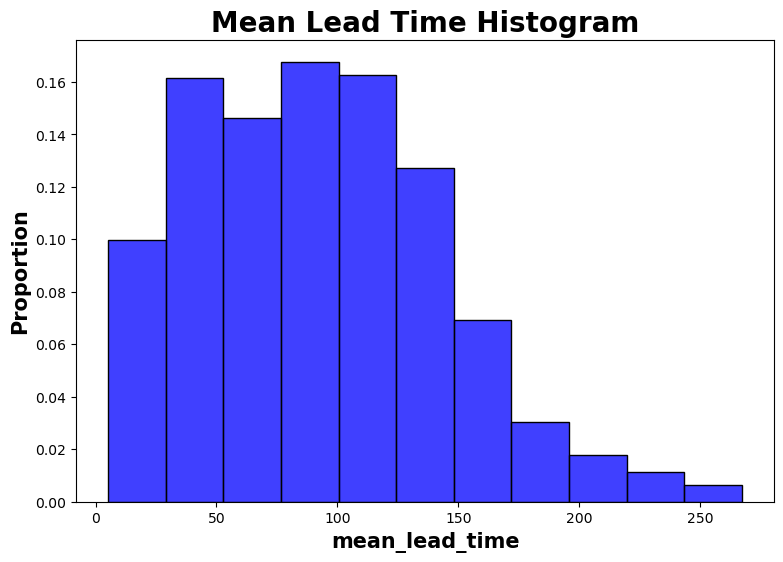

In [29]:
hist_distr('mean_lead_time', 'Mean Lead Time Histogram')

# Feature Engineering
- Might Make sense to make some variables that indicate if it is:
    - Weekend
    - Holiday 

- Check distributions and boxplots for these features as well

## Boolean Indicator for Weekend

In [30]:
# One hot encoding ofr if a day is a weekend or not
hotels_agg['is_weekend'] = np.where((hotels_agg['arrival_day_of_week'] == 'Friday') |
                                     (hotels_agg['arrival_day_of_week'] == 'Saturday') |
                                      (hotels_agg['arrival_day_of_week'] == 'Sunday'),
                                       1,0 )

# Verify that weekend indicator is encoded correctly
len(hotels_agg[hotels_agg['is_weekend'] == 1]) == len(hotels_agg.loc[(hotels_agg['arrival_day_of_week'] == 'Friday')
                   | (hotels_agg['arrival_day_of_week'] == 'Saturday') |
                    (hotels_agg['arrival_day_of_week'] == 'Sunday') ])

True

Boxplot for ADR by weekend or not

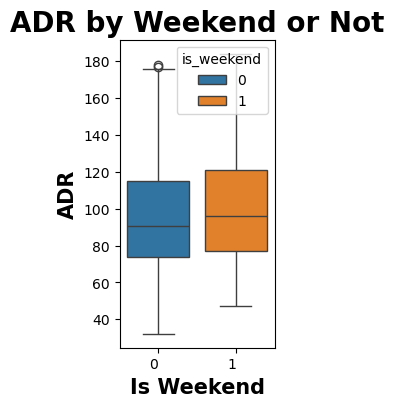

In [31]:
plt.figure(figsize=(2,4))

ax = sns.boxplot(data = hotels_agg, 
            x = 'is_weekend', 
            y ='adr', 
            hue = 'is_weekend')

plt.title('ADR by Weekend or Not', fontdict = {'fontweight':'bold', 'fontsize': 20})


# X axis
plt.xlabel(xlabel= 'Is Weekend',fontdict = {'fontweight':'bold', 'fontsize': 15})
plt.xticks(rotation = 0, ha = 'right', fontweight = 'normal') # Rotate x tick labels to make plot more readable
# Y axis
plt.ylabel(ylabel= 'ADR', fontdict ={'fontweight': 'bold', 'fontsize': 15})
plt.show() # THis hides x tick labels from printing 

Boxplot of Bookings for weekend or not

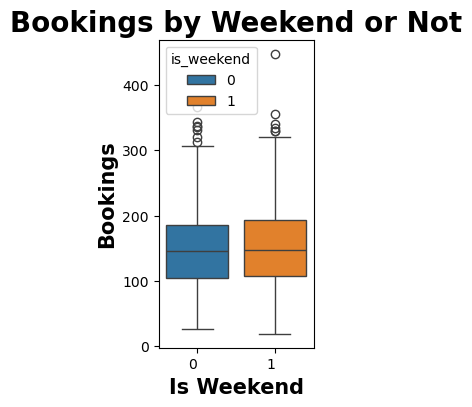

In [32]:
plt.figure(figsize=(2,4))

ax = sns.boxplot(data = hotels_agg, 
            x = 'is_weekend', 
            y ='bookings', 
            hue = 'is_weekend')

plt.title('Bookings by Weekend or Not', fontdict = {'fontweight':'bold', 'fontsize': 20})


# X axis
plt.xlabel(xlabel= 'Is Weekend',fontdict = {'fontweight':'bold', 'fontsize': 15})
plt.xticks(rotation = 0, ha = 'right', fontweight = 'normal') # Rotate x tick labels to make plot more readable
# Y axis
plt.ylabel(ylabel= 'Bookings', fontdict ={'fontweight': 'bold', 'fontsize': 15})
plt.show() # THis hides x tick labels from printing 

Revenue by is weekend or not

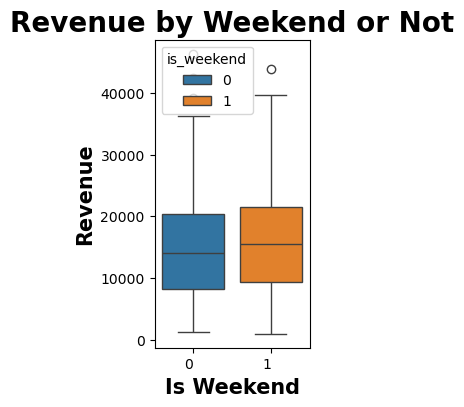

In [33]:
plt.figure(figsize=(2,4))

ax = sns.boxplot(data = hotels_agg, 
            x = 'is_weekend', 
            y ='revenue', 
            hue = 'is_weekend')

plt.title('Revenue by Weekend or Not', fontdict = {'fontweight':'bold', 'fontsize': 20})


# X axis
plt.xlabel(xlabel= 'Is Weekend',fontdict = {'fontweight':'bold', 'fontsize': 15})
plt.xticks(rotation = 0, ha = 'right', fontweight = 'normal') # Rotate x tick labels to make plot more readable
# Y axis
plt.ylabel(ylabel= 'Revenue', fontdict ={'fontweight': 'bold', 'fontsize': 15})
plt.show() # THis hides x tick labels from printing 

## Holiday Encoding 
- Modeling notebook has full implementation
- Most prevalent holidays:
    - New years day
    - Good Friday
    - Easter Sunday
    - Labor day
    - Christmas day

In [34]:
holiday_list = []

for hol in holidays.Belgium(years = [2015, 2016, 2017]).items():
    holiday_list.append(hol)

holiday_df = pd.DataFrame(holiday_list, columns= ['date', 'holiday']).sort_values(by ='date')
holiday_df

,date,holiday
24,2015-01-01,New Year's Day
25,2015-04-05,Easter Sunday
26,2015-04-06,Easter Monday
27,2015-05-01,Labor Day
28,2015-05-14,Ascension Day
29,2015-05-24,Whit Sunday
30,2015-05-25,Whit Monday
31,2015-07-21,National Day
32,2015-08-15,Assumption Day
33,2015-11-01,All Saints' Day
